In [1]:
import pandas as pd
import numpy as np
import warnings
import scipy
from datetime import timedelta

In [2]:
# Forceasting with decompasable model
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [3]:
# For marchine Learning Approach
from statsmodels.tsa.tsatools import lagmat
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [4]:
# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

warnings.filterwarnings('ignore')

In [5]:
train = pd.read_csv("/home/arnauinez/Documents/datasets/web-traffic-google/web-traffic-time-series-forecasting/train_1.csv")

In [6]:
train.head(5)

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [7]:
list(train.columns[-50:])+['Page']

['2016-11-12',
 '2016-11-13',
 '2016-11-14',
 '2016-11-15',
 '2016-11-16',
 '2016-11-17',
 '2016-11-18',
 '2016-11-19',
 '2016-11-20',
 '2016-11-21',
 '2016-11-22',
 '2016-11-23',
 '2016-11-24',
 '2016-11-25',
 '2016-11-26',
 '2016-11-27',
 '2016-11-28',
 '2016-11-29',
 '2016-11-30',
 '2016-12-01',
 '2016-12-02',
 '2016-12-03',
 '2016-12-04',
 '2016-12-05',
 '2016-12-06',
 '2016-12-07',
 '2016-12-08',
 '2016-12-09',
 '2016-12-10',
 '2016-12-11',
 '2016-12-12',
 '2016-12-13',
 '2016-12-14',
 '2016-12-15',
 '2016-12-16',
 '2016-12-17',
 '2016-12-18',
 '2016-12-19',
 '2016-12-20',
 '2016-12-21',
 '2016-12-22',
 '2016-12-23',
 '2016-12-24',
 '2016-12-25',
 '2016-12-26',
 '2016-12-27',
 '2016-12-28',
 '2016-12-29',
 '2016-12-30',
 '2016-12-31',
 'Page']

In [8]:
train_flat = pd.melt(train[list(train.columns[-50:])+['Page']], id_vars='Page', var_name='date', value_name='Visits')

In [9]:
train_flat['date'] = train_flat['date'].astype('datetime64[ns]')

In [10]:
train_flat.date.dt.dayofweek

0          5
1          5
2          5
3          5
4          5
          ..
7253145    5
7253146    5
7253147    5
7253148    5
7253149    5
Name: date, Length: 7253150, dtype: int64

In [11]:
train_flat['weekend'] = ((train_flat.date.dt.dayofweek) // 5 == 1).astype(float)

In [12]:
df_median = pd.DataFrame(train_flat.groupby(['Page'])['Visits'].median())

In [13]:
df_mean = pd.DataFrame(train_flat.groupby(['Page'])['Visits'].mean())

In [14]:
df_median.columns = ['median']
df_mean.columns = ['mean']

In [15]:
# Merging data
train_flat = train_flat.set_index('Page').join(df_mean).join(df_median)

In [18]:
train_flat.reset_index(inplace=True)

In [22]:
train_flat['weekday'] = train_flat['date'].apply(lambda x: x.weekday())
train_flat['year']=train_flat.date.dt.year 
train_flat['month']=train_flat.date.dt.month 
train_flat['day']=train_flat.date.dt.day

In [19]:
train_flat.head(5)

,Page,date,Visits,weekend,mean,median
0,!vote_en.wikipedia.org_all-access_all-agents,2016-11-12,2.0,1.0,2.836735,2.0
1,!vote_en.wikipedia.org_all-access_all-agents,2016-11-13,2.0,1.0,2.836735,2.0
2,!vote_en.wikipedia.org_all-access_all-agents,2016-11-14,4.0,0.0,2.836735,2.0
3,!vote_en.wikipedia.org_all-access_all-agents,2016-11-15,8.0,0.0,2.836735,2.0
4,!vote_en.wikipedia.org_all-access_all-agents,2016-11-16,3.0,0.0,2.836735,2.0


In [44]:
by_date = train_flat[['Page','date','Visits']].groupby(['date'])
for date, frame in by_date:
    print(f"{date!r}")
    print(frame.head(2), end="\n\n")
    print("------------------------")

Timestamp('2016-11-12 00:00:00')
                                            Page       date  Visits
0   !vote_en.wikipedia.org_all-access_all-agents 2016-11-12     2.0
50      !vote_en.wikipedia.org_all-access_spider 2016-11-12     0.0

------------------------
Timestamp('2016-11-13 00:00:00')
                                            Page       date  Visits
1   !vote_en.wikipedia.org_all-access_all-agents 2016-11-13     2.0
51      !vote_en.wikipedia.org_all-access_spider 2016-11-13     2.0

------------------------
Timestamp('2016-11-14 00:00:00')
                                            Page       date  Visits
2   !vote_en.wikipedia.org_all-access_all-agents 2016-11-14     4.0
52      !vote_en.wikipedia.org_all-access_spider 2016-11-14     3.0

------------------------
Timestamp('2016-11-15 00:00:00')
                                            Page       date  Visits
3   !vote_en.wikipedia.org_all-access_all-agents 2016-11-15     8.0
53      !vote_en.wikipedia.org_all-access_

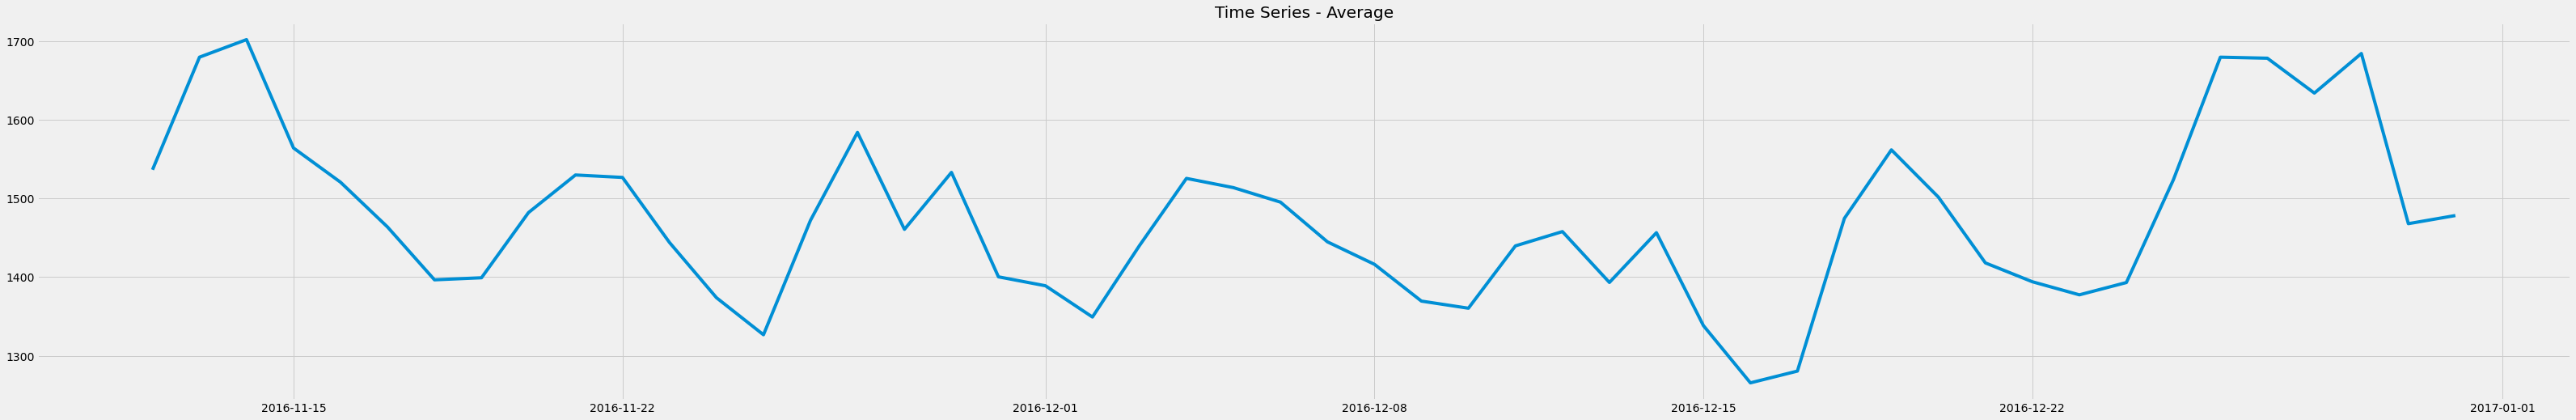

In [24]:
plt.figure(figsize=(50, 8))
mean_group = train_flat[['Page','date','Visits']].groupby(['date'])['Visits'].mean()
plt.plot(mean_group)
plt.title('Time Series - Average')
plt.show()

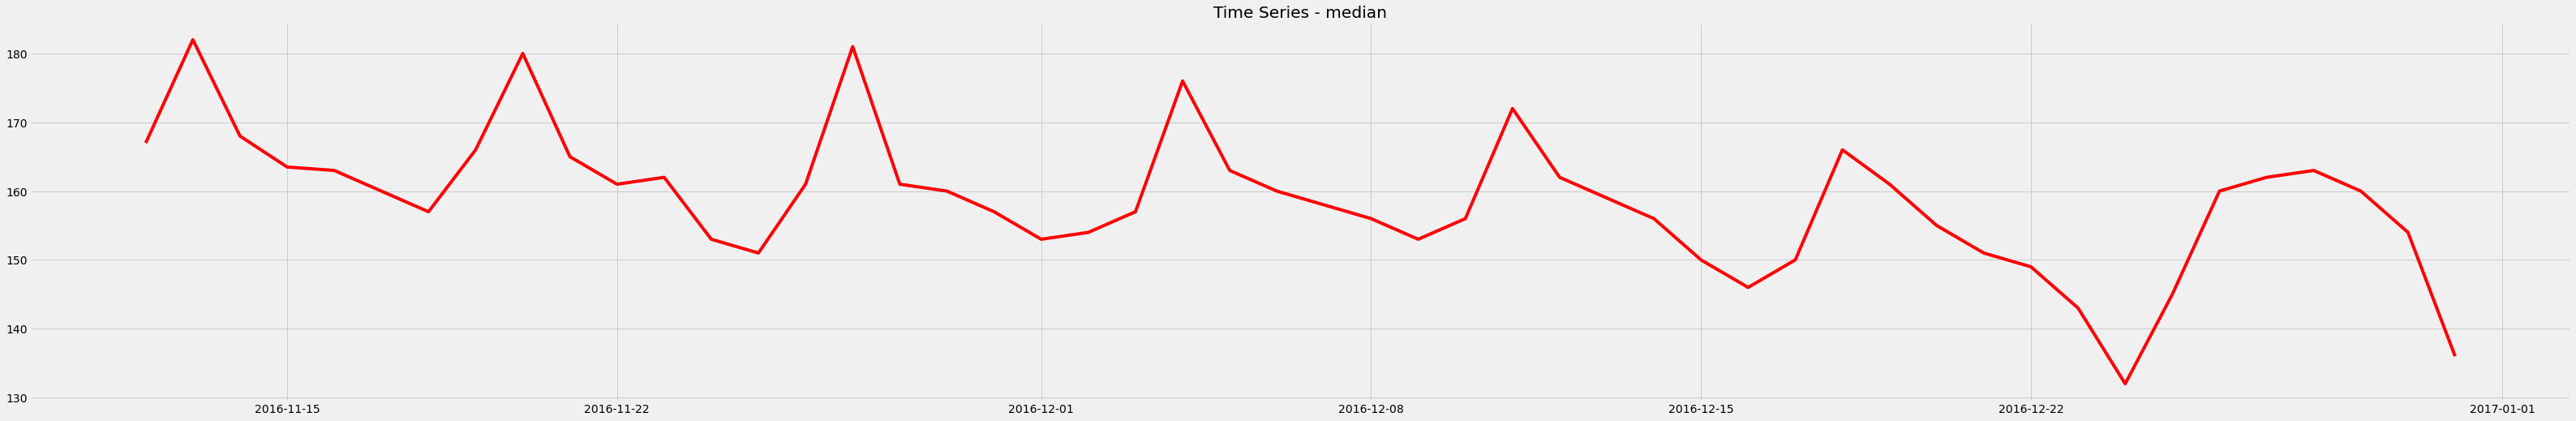

In [46]:
plt.figure(figsize=(50, 8))
median_group = train_flat[['Page','date','Visits']].groupby(['date'])['Visits'].median()
plt.plot(median_group, color = 'r')
plt.title('Time Series - median')
plt.show()

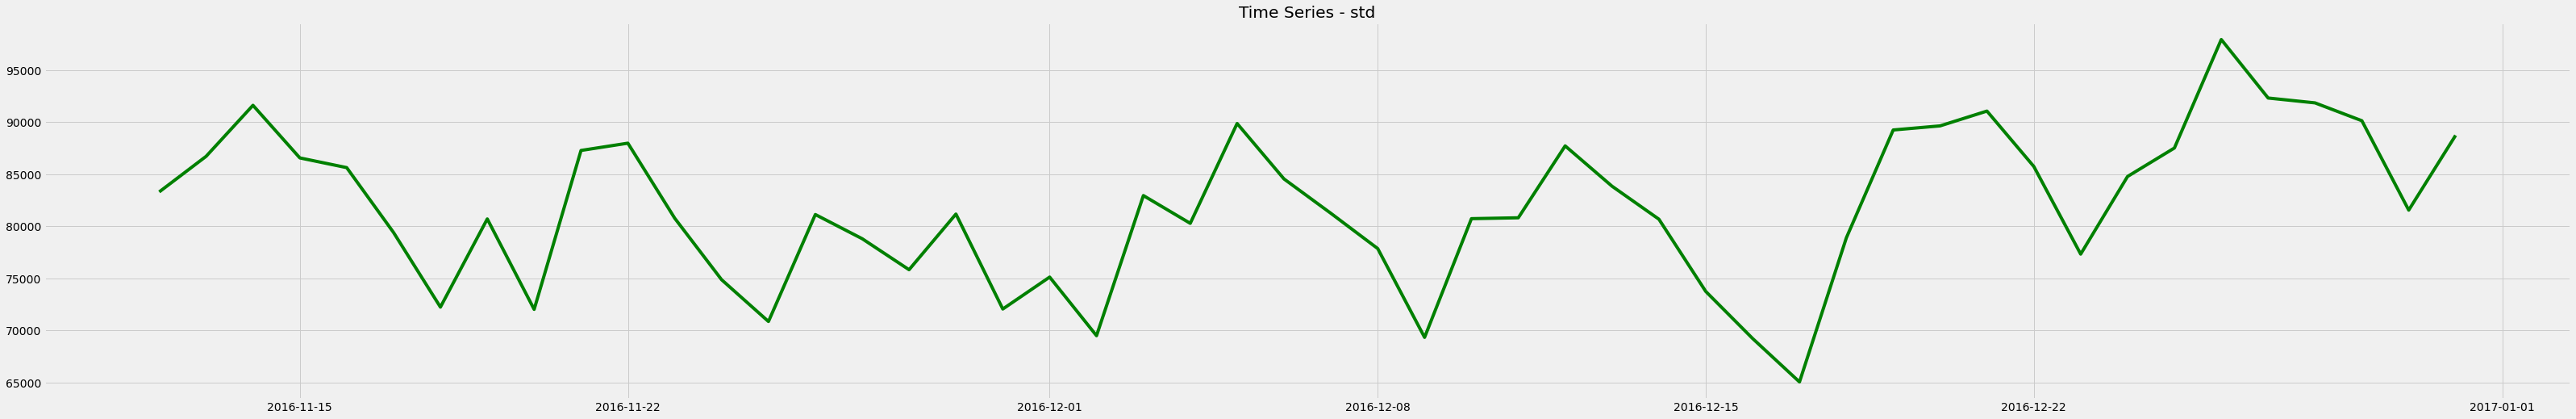

In [48]:
plt.figure(figsize=(50, 8))
std_group = train_flat[['Page','date','Visits']].groupby(['date'])['Visits'].std()
plt.plot(std_group, color = 'g')
plt.title('Time Series - std')
plt.show()